# Statistics In Sports

Statistics also plays a key role in ensuring the integrity of sports ranging from baseball and basketball to cycling and sumo wrestling.

The Premier League is by far one of the world’s most entertaining leagues. They have some of the best managers, players and fans! But, what makes it truly entertaining is the sheer unpredictability. There are 6 equally amazing teams with a different team lifting the trophy every season. Not only that, the league has also witnessed victories from teams outside of the top 6. So, let us analyze some of these instances.

So far, the implementation of statistics into soccer has been positive. Teams can easily gather information about their opponents and their tactics. This convenience allows managers to create well-thought out game plans that suit their team, maximize opponents' weaknesses, and increase their chances of winning.

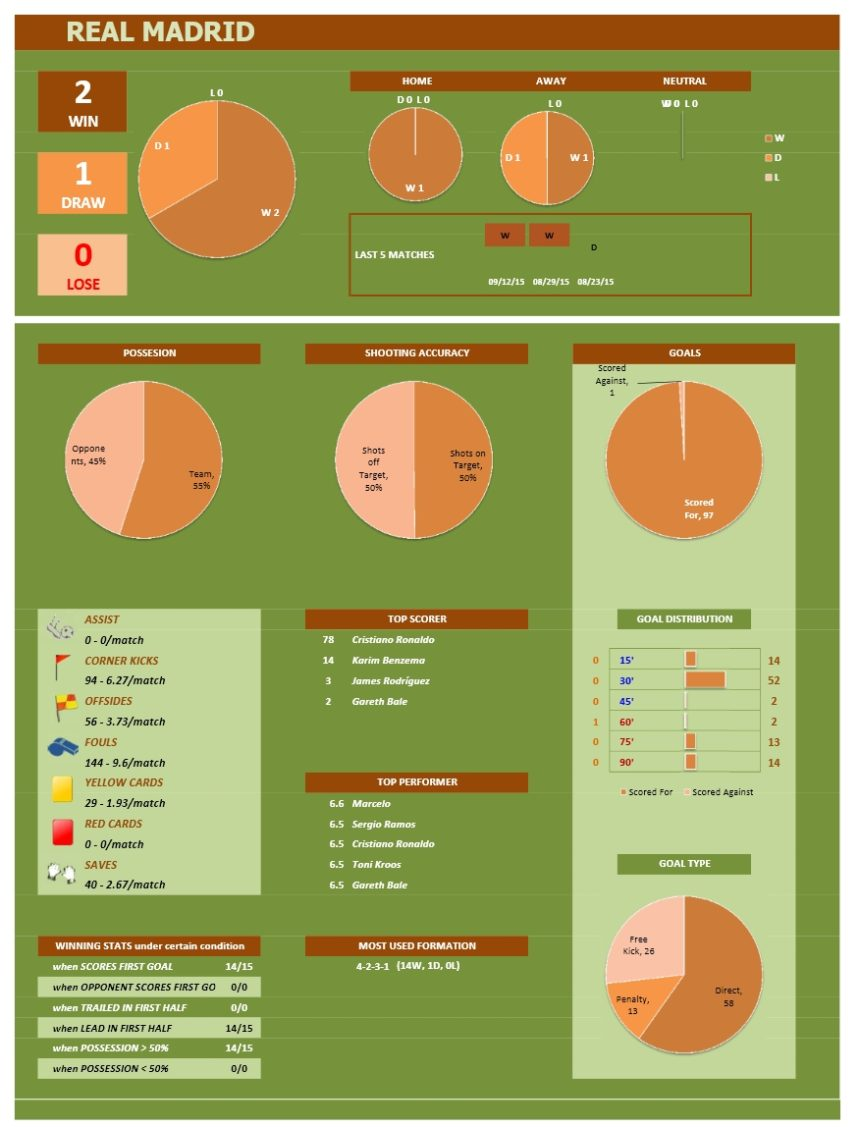

# What Are Goals In Football

A goal is scored when the whole of the ball passes over the goal line, between the goalposts and under the crossbar, provided that no offence has been committed by the team scoring the goal. If the goalkeeper throws the ball directly into the opponents' goal, a goal kick is awarded.

THE TIME OF SEASON/MOTIVATION: While a club battling for a league title is going to be hungry for a win, as is a side that is fighting to stay up, a club that has already won the title or has already been relegated is unlikely to work as hard, and often rest players as well.
THE REFEREE: Of course, when referee's send players off it make a massive impact on a match, but even if he is just awarding a yellow card then it can affect the outcome of the game as the player booked is less likely to go in as hard for the rest of the match.

SUBSTITUTES: The whole point of substitutes is for them to be able to come on and impact a match. Subs not only bring on a fresh pair of legs that are less tired than starters and more likely to track back and push forward, but can also play crucial roles in the formation of a team.

MIND GAMES/MANAGERS: Playing mind games has almost become a regular routine for top level managers, and rightly so. Just a simple mind game can do so much to impact a match, a good example coming from Sir Alex Ferguson.

Per his autobiography, when Manchester United were losing late on in a match at a certain point he would tap his watch and make sure to let the opposition know he is signalling this to his players. United's opposition already know that United have a tendency to come back from behind, and upon seeing this gesture they will think that United are going to come back. And because scientific studies prove that living creatures are more likely to accept things that have happened before than not - horses are more likely to lose to a horse they have already lost to in a race even if they are on an even playing field - they often succumb to a loss.

FORM/INJURIES/FIXTURES: A team on better form is more likely to win a match than if they have been on a poor run of form, while a team in the middle of a condensed run of fixtures is less likely to win than a well rested team.
These are just some of the things that affect matches - if you have any other just mention them in the comment section below and I'll try to add them in!

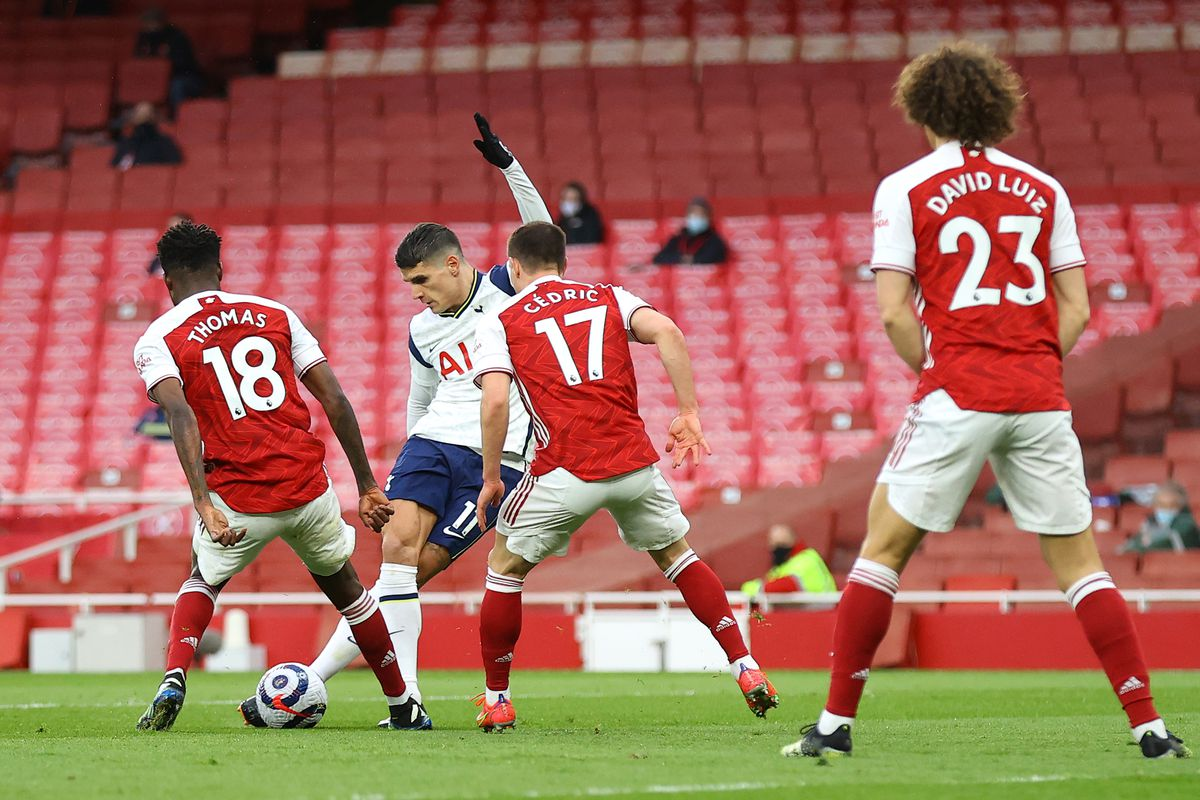

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Loading CSV Files

In [2]:
df2014 = pd.read_csv('../input/premier-league-matches-20142020/prem2014.csv')
df2015 = pd.read_csv('../input/premier-league-matches-20142020/prem2015.csv')
df2016 = pd.read_csv('../input/premier-league-matches-20142020/prem2016.csv')
df2017 = pd.read_csv('../input/premier-league-matches-20142020/prem2017.csv')
df2018 = pd.read_csv('../input/premier-league-matches-20142020/prem2018.csv')
df2019 = pd.read_csv('../input/premier-league-matches-20142020/prem2019.csv')
df2020 = pd.read_csv('../input/premier-league-matches-20142020/prem2020.csv')

# Feature Engineering

In [3]:
def feature(df):
    h_sc=[]
    a_sc = []
    h_co = []
    a_co = []
    for i in range(0, len(df), 1):
        score = df['Score'][i]
        score = score.split('-')
        h_sc.append(score[0])
        a_co.append(score[0])
        a_sc.append(score[1])
        h_co.append(score[1])
    df['Home Team Goals Scored'] = h_sc
    df['Away Team Goals Scored'] = a_sc
    df['Home Team Goals Conceeded'] = h_co
    df['Away Team Goals Conceeded'] = a_co
    return df

In [4]:
df2014 = feature(df2014)
df2014['year'] = 2014
df2015 = feature(df2015)
df2015['year'] = 2015
df2016 = feature(df2016)
df2016['year'] = 2016
df2017 = feature(df2017)
df2017['year'] = 2017
df2018 = feature(df2018)
df2018['year'] = 2018
df2019 = feature(df2019)
df2019['year'] = 2019
df2020 = feature(df2020)
df2020['year'] = 2020

In [5]:
final_data = pd.concat([df2014,df2015,df2016,df2017, df2018, df2019, df2020])
final_data.reset_index(inplace=True)
final_data.drop('index', axis=1, inplace=True)
df1 = final_data

# Data Exploration

In [6]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Home Team                      2660 non-null   object 
 1   Away Team                      2660 non-null   object 
 2   Score                          2660 non-null   object 
 3   Half Time Score                2660 non-null   object 
 4   Match Excitement               2660 non-null   float64
 5   Home Team Rating               2660 non-null   float64
 6   Away Team Rating               2660 non-null   float64
 7   Home Team Possession %         2660 non-null   int64  
 8   Away Team Possession %         2660 non-null   int64  
 9   Home Team Off Target Shots     2660 non-null   float64
 10  Home Team On Target Shots      2660 non-null   float64
 11  Home Team Total Shots          2660 non-null   float64
 12  Home Team Blocked Shots        2660 non-null   f

In [7]:
final_data.describe()

,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,...,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,5.348571,6.476692,6.238797,51.321429,48.678571,5.378947,4.670677,13.858271,3.818045,5.776316,...,4.703759,21.442857,76.968421,18.098872,26.070301,10.986466,1.757143,0.035338,0.040602,2017.000000
std,1.693194,0.995476,0.990078,12.403523,12.403523,2.731567,2.622373,5.668131,2.549099,3.121093,...,2.688446,6.265719,7.586814,7.294508,11.327858,3.523387,1.281851,0.186694,0.206709,2.000376
min,1.700000,2.400000,1.300000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,48.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2014.000000
25%,4.100000,5.800000,5.600000,42.000000,39.000000,3.000000,3.000000,10.000000,2.000000,3.000000,...,3.000000,17.000000,72.000000,13.000000,18.000000,9.000000,1.000000,0.000000,0.000000,2015.000000
50%,5.300000,6.500000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,5.000000,...,4.000000,21.000000,78.000000,17.000000,25.000000,11.000000,2.000000,0.000000,0.000000,2017.000000
75%,6.400000,7.100000,6.900000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,8.000000,...,6.000000,25.000000,83.000000,23.000000,33.000000,13.000000,3.000000,0.000000,0.000000,2019.000000
max,10.000000,10.000000,10.000000,83.000000,82.000000,16.000000,17.000000,43.000000,19.000000,19.000000,...,16.000000,47.000000,94.000000,53.000000,79.000000,26.000000,9.000000,2.000000,2.000000,2020.000000


In [8]:
final_data.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,5.0,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,5.0,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,5.0,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,10.0,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,7.0,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [9]:
final_data.columns

Index(['Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
       'Hom

# Home Team Goals Scored

 The following cells will claculate the goals scored by the home team in the match

# Feature Selection

In [10]:
X = final_data[['Home Team Possession %', 'Home Team Total Shots', 'Home Team On Target Shots','Home Team Corners',
        'Home Team Pass Success %', 'Away Team Possession %', 'Match Excitement', 'Away Team Total Shots', 'Away Team Pass Success %',
               'Home Team Rating', 'Away Team Rating', 'year']]
y = final_data['Home Team Goals Scored']

# Train Test Split 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
predictions = model.predict(X_test)
# for i in range(len(predictions)):
#     predictions

# Prediction Metrics

### MSE

In [14]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions, squared=False)
print(errors)

0.47406640058541283


### RMSE

In [15]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, predictions)
print(errors)

0.30742596810933936


### R2 Score

In [16]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.8478119624022291


### Accuracy

In [17]:
accuracy = round(model.score(X_test,y_test)*100, 2)
print(str(accuracy)+'%')

87.26%


# XG Boost Regressor

In [18]:
import xgboost as xg
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [19]:
model.fit(X_train, y_train)

[19:23:56] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [20]:
predictions = model.predict(X_test)

# Prediction Metrics

### MSE

In [21]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions, squared=False)
print(errors)

0.4900718451657694


### RMSE

In [22]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, predictions)
print(errors)

0.32448180901641893


### R2 Score

In [23]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.8258499160355471


### Accuracy

In [24]:
accuracy = round(model.score(X_test,y_test)*100, 2)
print(str(accuracy)+'%')

86.38%


# Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
bestr2 = -2
bestaplha = 0
# for i in range(1,10000,1):
#     best_alpha = i*0.0001
#     regr = Lasso(alpha=best_alpha, max_iter=50000)
#     regr.fit(X_train, y_train)
#     predictions = regr.predict(X_test)
#     r2score = r2_score(predictions,y_test)
#     if(r2score>= bestr2):
#         bestr2 = r2score
#         bestaplha = best_alpha
best_alpha = 0.0001
regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

### MSE

In [26]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions, squared=False)
print(errors)

0.4966809850679379


### RMSE

In [27]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, predictions)
print(errors)

0.36520021408582337


### R2 Score

In [28]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.8364011676780221


### Accuracy

In [29]:
accuracy = round(regr.score(X_test,y_test)*100, 2)
print(str(accuracy)+'%')

86.02%


# Away Team Goals Scored

 The following cells will claculate the goals scored by the home team in the match

# Feature Selection

In [30]:
X = final_data[['Away Team Possession %', 'Away Team Total Shots', 'Away Team On Target Shots','Away Team Corners',
        'Away Team Pass Success %', 'Home Team Possession %', 'Match Excitement', 'Home Team Total Shots', 'Home Team Pass Success %',
               'Away Team Rating', 'Home Team Rating', 'year']]
y = final_data['Away Team Goals Scored']

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
RandomForestRegressor()
predictions = model.predict(X_test)

# Pediction Metrics

### MSE

In [33]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions, squared=False)
print(errors)

0.3840580287874243


### RMSE

In [34]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, predictions)
print(errors)

0.2489407744874715


### R2 Score

In [35]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.8840025144798856


### Accuracy

In [36]:
accuracy = round(model.score(X_test,y_test)*100, 2)
print(str(accuracy)+'%')

89.88%


# XGBoost Regressor

In [37]:
import xgboost as xg
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [38]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

[19:24:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


# Prediction Metrics

### MSE

In [39]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions, squared=False)
print(errors)

0.3886032914421608


### RMSE

In [40]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, predictions)
print(errors)

0.267183555961944


### R2 Score

In [41]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.8765558096165917


### Accuracy

In [42]:
accuracy = round(model.score(X_test,y_test)*100, 2)
print(str(accuracy)+'%')

89.64%


# Ridge Regressor

In [43]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [44]:
predictions = model.predict(X_test)

# Pediction Metrics

### MSE

In [45]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions, squared=False)
print(errors)

0.44713574749555735


### RMSE

In [46]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, predictions)
print(errors)

0.3268291462653074


### R2 Score

In [47]:
from sklearn.metrics import r2_score
print(r2_score(predictions,y_test))

0.8459168882130186


### Accuracy

In [48]:
accuracy = round(model.score(X_test,y_test)*100, 2)
print(str(accuracy)+'%')

86.28%


# Conclusion

Goals scored by away team and home team can be predicted by their respective stats such as shots on target, possession %, pass success %. Their differnce lies in the fact that one team is playing in the home stadium and other is playing in the away stadium. The crowds and ton more factors come in play, because of lack of data we cannot calculate the exact prediction, but with this data we can score a pretty good guess.<br><br>

Another important factor i noticed it that predicting with half time scores can increase the accuracy significantly higher, but it is highly correlated hence we should try to omit it from our features list.